<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-the-data-file-and-reviewing-general-information" data-toc-modified-id="Reading-the-data-file-and-reviewing-general-information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading the data file and reviewing general information</a></span></li><li><span><a href="#Data-preprocessing-and-adding-additional-columns" data-toc-modified-id="Data-preprocessing-and-adding-additional-columns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing and adding additional columns</a></span><ul class="toc-item"><li><span><a href="#Type-conversion-and-duplicate-handling" data-toc-modified-id="Type-conversion-and-duplicate-handling-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Type conversion and duplicate handling</a></span></li><li><span><a href="#Handling-anomalous-values" data-toc-modified-id="Handling-anomalous-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Handling anomalous values</a></span></li><li><span><a href="#Adding-additional-fields" data-toc-modified-id="Adding-additional-fields-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Adding additional fields</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Overview-of-the-dataset" data-toc-modified-id="Overview-of-the-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Overview of the dataset</a></span></li><li><span><a href="#Monthly-dynamics-of-key-store-performance-indicators" data-toc-modified-id="Monthly-dynamics-of-key-store-performance-indicators-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Monthly dynamics of key store performance indicators</a></span></li><li><span><a href="#Relationship-between-general-store-metrics-and-day-of-week,-day-of-month,-and-time-of-order" data-toc-modified-id="Relationship-between-general-store-metrics-and-day-of-week,-day-of-month,-and-time-of-order-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Relationship between general store metrics and day of week, day of month, and time of order</a></span></li></ul></li><li><span><a href="#Categorizing-Products" data-toc-modified-id="Categorizing-Products-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Categorizing Products</a></span></li><li><span><a href="#Customer-Segmentation-Based-on-Purchase-History" data-toc-modified-id="Customer-Segmentation-Based-on-Purchase-History-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Customer Segmentation Based on Purchase History</a></span><ul class="toc-item"><li><span><a href="#Segmenting-Customers-Using-RFM-Analysis" data-toc-modified-id="Segmenting-Customers-Using-RFM-Analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Segmenting Customers Using RFM Analysis</a></span></li><li><span><a href="#Analysis-of-General-Metrics-Across-Customer-Segments" data-toc-modified-id="Analysis-of-General-Metrics-Across-Customer-Segments-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Analysis of General Metrics Across Customer Segments</a></span></li></ul></li><li><span><a href="#Formulation-and-Testing-of-Statistical-Hypotheses" data-toc-modified-id="Formulation-and-Testing-of-Statistical-Hypotheses-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Formulation and Testing of Statistical Hypotheses</a></span></li><li><span><a href="#Analysis-of-Category-Preferences-by-Customer-Segments" data-toc-modified-id="Analysis-of-Category-Preferences-by-Customer-Segments-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Analysis of Category Preferences by Customer Segments</a></span></li><li><span><a href="#Conclusions-and-Recommendations" data-toc-modified-id="Conclusions-and-Recommendations-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions and Recommendations</a></span></li></ul></div>

# Identifying Consumer Profiles for the Online Store "Still Here"

This project will investigate the transaction history of the home goods online store "Still Here" to segment users based on their consumption profiles.

**Objective:**
Segment customers based on their purchase history to develop strategies for future marketing campaigns.

**Data Description:**
The dataset `ecom_dataset_upd.csv` contains the following fields:
- `date` — order date;
- `customer_id` — customer identifier;
- `order_id` — order identifier;
- `product` — product name;
- `quantity` — quantity of the product in the order;
- `price` — price of the product.

**The following steps will be taken to achieve the objectives:**

- Review and preliminary data processing;
- Conduct exploratory data analysis, analyze the overall performance indicators of the store;
- Categorize products and analyze the resulting groups;
- Segment customers based on their purchase history (RFM analysis), analyze user metrics by segment;
- Test statistical hypotheses about the equality of the average number of purchases and the average order amount between users from different segments;
- Analyze product category preferences for users in different segments;
- Conclusions and recommendations.

In [363]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import scipy.stats as stats

In [364]:
#Variables for chart formatting
plt.style.use('seaborn-whitegrid')
sns.set_palette('Set2')
cmap = 'BuGn'
fontsize=13
figsize_w=(18,5)
figsize_n=(7,5)
figsize_norm=(10,6)
px_template = "simple_white"
px_palette =px.colors.qualitative.Set2

## Reading the data file and reviewing general information

In [365]:
#Loading data
data = pd.read_csv("data.csv")

In [366]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


The dataset contains 7,474 transaction records. Each record includes the order date, customer ID, order ID, product name, quantity of product per order, and product price.
There are no missing values. Column headers are stylistically correct.
The 'date' column uses an incorrect data type.
At first glance, the dataset appears to have a sufficient volume for analysis, but preprocessing is required.

## Data preprocessing and adding additional columns 

### Type conversion and duplicate handling 

The 'date' column is in `int` format. Let's convert it to `datetime`.

In [368]:
#Type conversion
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

In [369]:
#Convert column names to lowercase
data['customer_id'] = data['customer_id'].apply(lambda x: x.lower())

Let’s check the dataset for explicit and implicit duplicates:

In [370]:
#Checking for explicit duplicates
data.duplicated().sum()

0

In [371]:
#Checking for implicit duplicates
data[['order_id', 'product', 'quantity', 'price']].duplicated().sum()

1897

Since 'order_id' is a unique identifier for orders, there should not be duplicates. Let’s exclude them from the analysis.

In [372]:
data = data[~data[['order_id', 'product', 'quantity', 'price']].duplicated()]

Let’s check whether each order ID corresponds to only one user and one date:

In [373]:
orders_to_remove = data.groupby(['order_id']).agg({'customer_id':'nunique'}).query('customer_id > 1').index\
                       .append(data.groupby('order_id').agg({'date':'nunique'}).query('date > 1').index)
len(orders_to_remove)

27

In [374]:
data = data.query('order_id not in @orders_to_remove')

There were 27 orders that were linked to multiple users or multiple dates. These orders were excluded from the analysis.

In [375]:
display('Duplicate records {:.2%}'.format((1897+27)/7474))

'Duplicate records 25.74%'

Duplicate records made up about 26% of the dataset. This may indicate an issue with the data export process.

### Handling anomalous values

Let’s check for outliers in the `quantity` and `price` columns.

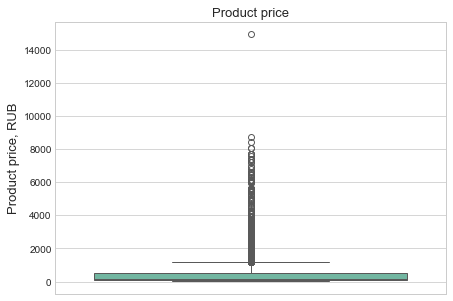

In [376]:
plt.figure(figsize=figsize_n)
ax=sns.boxplot(y='price', data=data)
plt.title('Product price', fontsize=fontsize)
plt.ylabel('Product price, RUB', fontsize=fontsize)
plt.show()

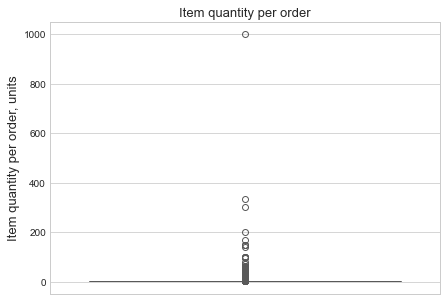

In [377]:
plt.figure(figsize=figsize_n)
ax=sns.boxplot(y='quantity', data=data)
plt.title('Item quantity per order', fontsize=fontsize)
plt.ylabel('Item quantity per order, units', fontsize=fontsize)
plt.show()

We’ll assume that a product price above 10,000 RUB or a quantity over 400 units is an outlier.
Let’s see what percentage of records meet either condition:

In [378]:
display('Number of orders with item price > 10,000 RUB: {}'.format(
    data.query('price > 10000')['customer_id'].count()),
        'Number of orders with item quantity > 400 {}:'.format(
            data.query('quantity > 400')['customer_id'].count()))

'Number of orders with item price > 10,000 RUB: 1'

'Number of orders with item quantity > 400 1:'

There are only two orders in the dataset with either very high prices or abnormally large quantities.
While expensive items may exist in the store’s inventory, they are not typical in this dataset and may distort the analysis.
Therefore, we’ll exclude orders with anomalous values for price or quantity from the analysis.

In [379]:
orders = data.query('price > 10000 | quantity > 400')['order_id'].to_list()
data = data.query('order_id not in @orders')
#Overview of the dataset after preprocessing
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5477 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5477 non-null   datetime64[ns]
 1   customer_id  5477 non-null   object        
 2   order_id     5477 non-null   int64         
 3   product      5477 non-null   object        
 4   quantity     5477 non-null   int64         
 5   price        5477 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 299.5+ KB


### Adding additional fields

To analyze trends over time, we’ll break the data down by month.
We’ll create a new column `month` containing the date rounded to the first of the month.
We'll also examine how user behavior varies by day of the week, day of the month, and hour of purchase.
For this, we’ll extract those features from the order date into new columns: `weekday`, `day`, and `hour`.
Additionally, we’ll create a `total` column (equal to quantity\*price) and a `date_short` column with just the date (without time).

In [380]:
data['date_short'] = data['date'].dt.date
data['month'] = data['date'].dt.to_period('M').dt.to_timestamp()
data['weekday'] = pd.DatetimeIndex(data['date']).weekday
data['day'] = pd.DatetimeIndex(data['date']).day
data['hour'] = pd.DatetimeIndex(data['date']).hour
data['total'] = data['quantity']*data['price']
#Checking the result
data.head()

,date,customer_id,order_id,product,quantity,price,date_short,month,weekday,day,hour,total
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,2018-10-01,0,1,0,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,2018-10-01,0,1,0,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01,0,1,0,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,2018-10-01,0,1,0,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10-01,0,1,0,112.0


**Conclusion**
During preprocessing, 1,924 duplicate records (~26% of the total) were removed.
Two records were excluded due to product prices exceeding 10,000 RUB or quantities exceeding 400 units.
The `date` column was converted to `datetime`.
The final dataset contains 5,477 records.
Additional columns were added:
* `month` (date rounded to the first of the month)
* `weekday` (day of the week)
* `day` (day of the month)
* `hour` (order time)
* `total` (total cost of the item)
* `date_short` (date without time)

## Exploratory Data Analysis

### Overview of the dataset

Let’s determine the time range covered by the data.

In [381]:
display('Earliest date {}'.format(data['date'].min()),
        'Latest date {}'.format(data['date'].max()))

'Earliest date 2018-10-01 00:00:00'

'Latest date 2020-01-31 15:00:00'

Let’s find the number of unique users, orders, and products for the entire period.

In [382]:
display('Number of unique users {}'.format(data['customer_id'].nunique()),
        'Number of unique orders {}'.format(data['order_id'].nunique()),
        'Number of unique products {}'.format(data['product'].nunique())
       )

'Number of unique users 2408'

'Number of unique orders 3494'

'Number of unique products 2327'

Let’s calculate the store's total revenue, average monthly revenue, and the average check for the entire period.

In [383]:
display('Total revenue {:.1f} RUB'.format(data['total'].sum()),
        'Average monthly revenue {:.1f} RUB'.format(data.groupby('month').agg({'total':'sum'}).mean()['total']),
        'Average check {:.1f} RUB'.format(data.groupby('order_id').agg({'total':'sum'}).mean()['total'])
       )

'Total revenue 3890216.4 RUB'

'Average monthly revenue 243138.5 RUB'

'Average check 1113.4 RUB'

The dataset contains data on 2,408 store customers and 3,494 orders.
Thus, on average, a customer makes ~1.5 orders over 16 months.
The orders contain 2,327 different product items.
During the observed period (October 1, 2018 to January 31, 2020), the store's revenue amounted to 3,890,216 RUB,
the average monthly revenue was 243,138 RUB, and the average check was 1,113 RUB.

### Monthly dynamics of key store performance indicators

Analysis of monthly changes in user activity, order frequency, revenue, and average check.

In [384]:
pivot_month = data.groupby('month').agg({
    'customer_id': 'nunique',
    'order_id': 'nunique',
    'total': 'sum'
}).reset_index().merge(
    data.groupby(['month', 'order_id'])
        .agg({'total': 'sum'})
        .groupby('month')
        .agg({'total': 'mean'})
        .reset_index(),
    on='month'
).rename(columns={'total_x': 'revenue_per_month', 'total_y': 'avg_bill'}) \
 .round({'revenue_per_month': 1, 'avg_bill': 1})

<Figure size 1296x360 with 0 Axes>

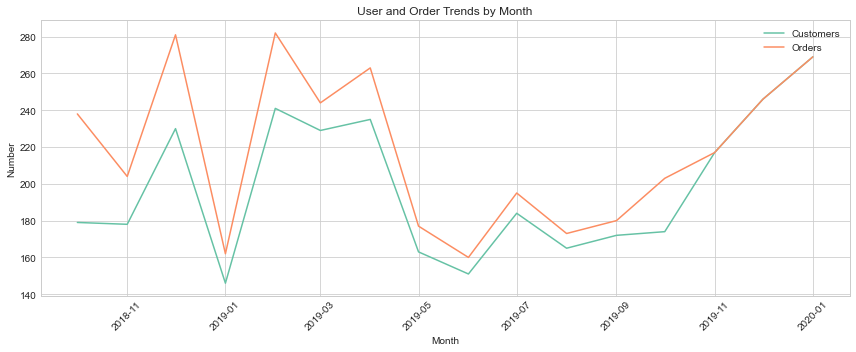

In [385]:
plt.figure(figsize=figsize_w)
x = pivot_month['month'].values
y_users = pivot_month['customer_id'].values
y_orders = pivot_month['order_id'].values

plt.figure(figsize=(12, 5))
plt.plot(x, y_users, label='Customers')
plt.plot(x, y_orders, label='Orders')

plt.xlabel("Month")
plt.ylabel("Number")
plt.title("User and Order Trends by Month")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

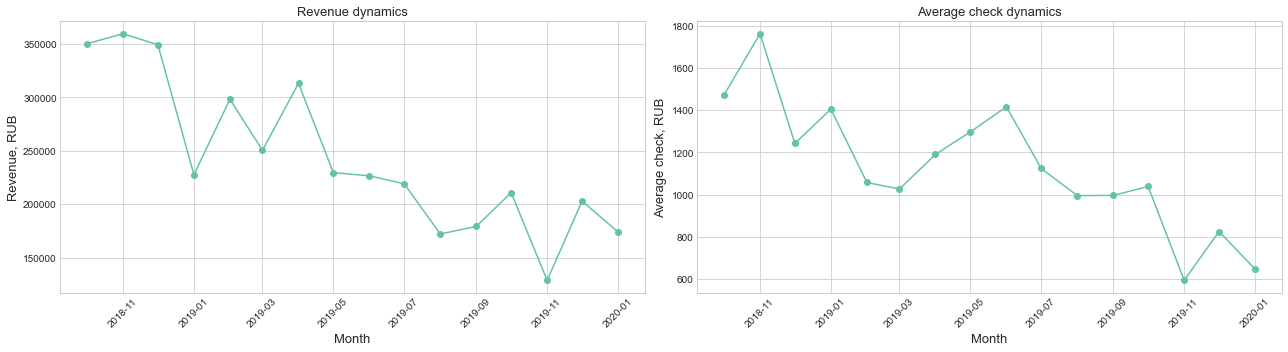

In [386]:
import matplotlib.pyplot as plt

x = pivot_month['month'].values
y_revenue = pivot_month['revenue_per_month'].values
y_avg_bill = pivot_month['avg_bill'].values

fig = plt.figure(figsize=figsize_w)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, y_revenue, marker='o')
ax2.plot(x, y_avg_bill, marker='o')

ax1.set_title('Revenue dynamics', fontsize=fontsize)
ax1.set_xlabel('Month', fontsize=fontsize)
ax1.set_ylabel('Revenue, RUB', fontsize=fontsize)

ax2.set_title('Average check dynamics', fontsize=fontsize)
ax2.set_xlabel('Month', fontsize=fontsize)
ax2.set_ylabel('Average check, RUB', fontsize=fontsize)

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The trends in the number of unique users and orders are nearly identical.
In the last three months of observation, the two indicators are equal — meaning users placed only one order per month.
Therefore, in this section we will analyze just one metric: the number of orders.
The peak number of orders (282) was recorded in February 2019.
In January 2019 and from May to October 2019, there was a drop in orders (as low as 160).
Although there was a positive trend in the number of orders in the last three months, both monthly revenue and average check showed a general decline over the entire observed period.
The decline in orders between May and October 2019 might be seasonal and considered normal.
However, the lack of positive response in financial metrics despite an increase in order count toward the end of the period may point to problems.
The metrics in Q4 2019 are significantly lower than in early 2020.

### Relationship between general store metrics and day of week, day of month, and time of order

Let’s analyze how the average number of orders and average check vary depending on the day of the month, day of the week, and hour of the order.

In [387]:
pivot_day = data.groupby(['day', 'date_short']).agg({
    'order_id':'nunique'
}).groupby('day').agg({'order_id':'mean'}).reset_index().merge(data.groupby(['day', 'order_id']).agg({'total':'sum'}).groupby('day')
                    .agg({'total':'mean'}), on='day').reset_index().rename(columns={'total':'avg_bill'})\
                    .round({'avg_bill': 1})
pivot_weekday = data.groupby(['weekday', 'date_short']).agg({'order_id':'nunique'}).groupby('weekday')\
                    .agg({'order_id':'mean'})\
                    .reset_index().merge(data.groupby(['weekday', 'order_id']).agg({'total':'sum'}).groupby('weekday')
                    .agg({'total':'mean'}), on='weekday').reset_index().rename(columns={'total':'avg_bill'})\
                    .round({'avg_bill': 1})
pivot_hour = data.groupby(['hour', 'date_short']).agg({'order_id':'nunique'}).groupby('hour')\
                    .agg({'order_id':'mean'}).reset_index().merge(data.groupby(['hour', 'order_id']).agg({'total':'sum'}).groupby('hour')
                    .agg({'total':'mean'}), on='hour').reset_index().rename(columns={'total':'avg_bill'})\
                    .round({'avg_bill': 1})

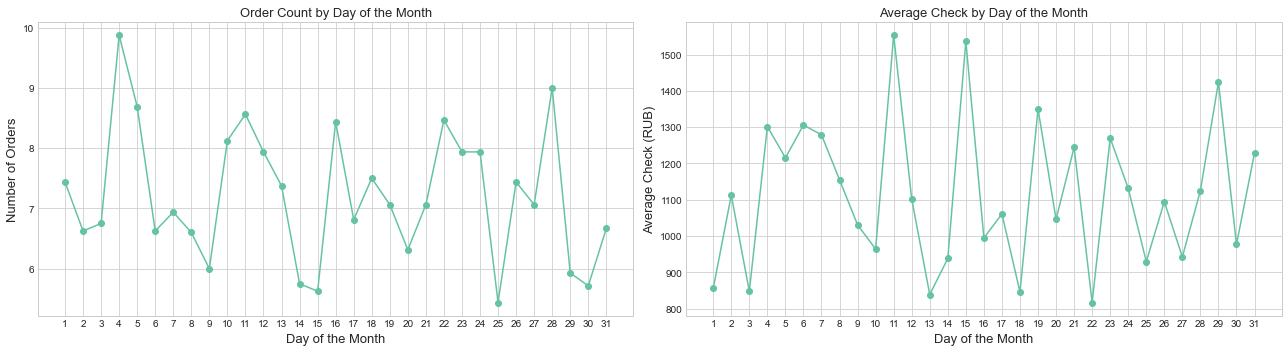

In [388]:
x = pivot_day['day'].values
y_orders = pivot_day['order_id'].values
y_avg_bill = pivot_day['avg_bill'].values

fig = plt.figure(figsize=figsize_w)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, y_orders, marker='o')
ax2.plot(x, y_avg_bill, marker='o')

ax1.set_title('Order Count by Day of the Month', fontsize=fontsize)
ax1.set_xlabel('Day of the Month', fontsize=fontsize)
ax1.set_ylabel('Number of Orders', fontsize=fontsize)

ax2.set_title('Average Check by Day of the Month', fontsize=fontsize)
ax2.set_xlabel('Day of the Month', fontsize=fontsize)
ax2.set_ylabel('Average Check (RUB)', fontsize=fontsize)

ax1.set_xticks(range(1, 32))
ax2.set_xticks(range(1, 32))

plt.tight_layout()
plt.show()

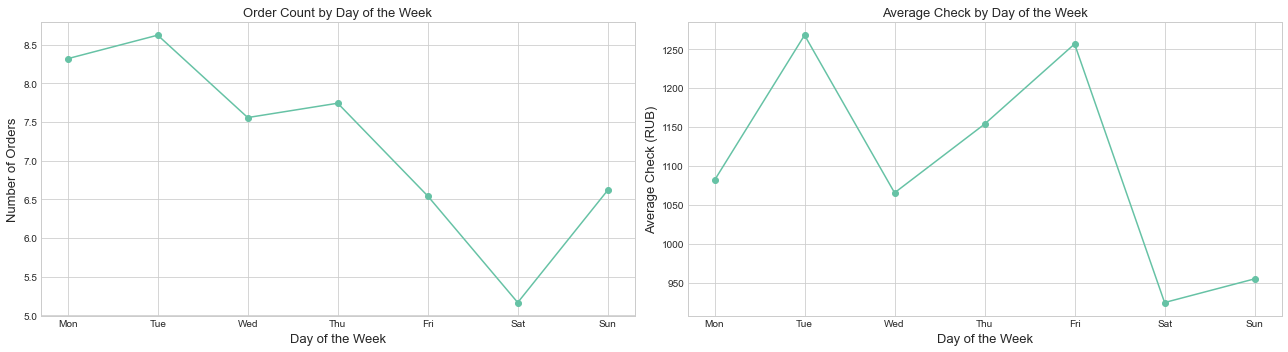

In [389]:
x = pivot_weekday['weekday'].values
y_orders = pivot_weekday['order_id'].values
y_avg_bill = pivot_weekday['avg_bill'].values

fig = plt.figure(figsize=figsize_w)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, y_orders, marker='o')
ax2.plot(x, y_avg_bill, marker='o')

ax1.set_title('Order Count by Day of the Week', fontsize=fontsize)
ax1.set_xlabel('Day of the Week', fontsize=fontsize)
ax1.set_ylabel('Number of Orders', fontsize=fontsize)

ax2.set_title('Average Check by Day of the Week', fontsize=fontsize)
ax2.set_xlabel('Day of the Week', fontsize=fontsize)
ax2.set_ylabel('Average Check (RUB)', fontsize=fontsize)

weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for ax in [ax1, ax2]:
    ax.set_xticks(range(7))
    ax.set_xticklabels(weekday_labels)

plt.tight_layout()
plt.show()

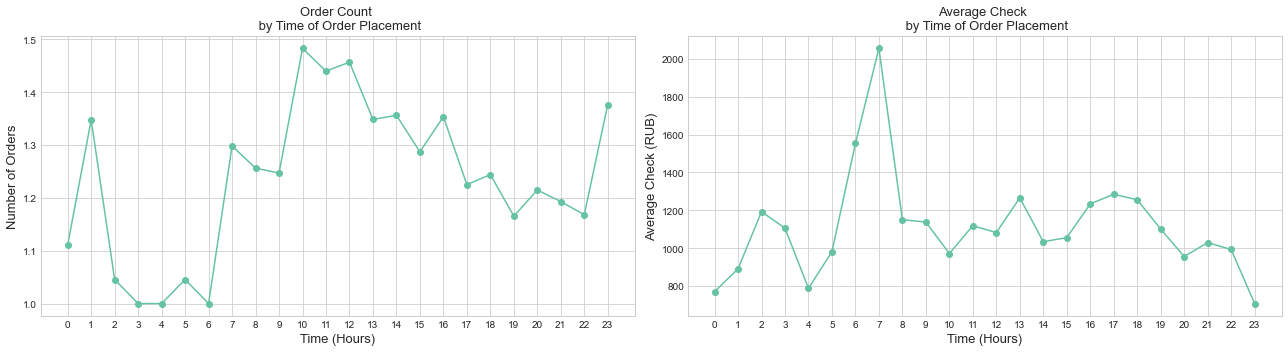

In [390]:
x = pivot_hour['hour'].values
y_orders = pivot_hour['order_id'].values
y_avg_bill = pivot_hour['avg_bill'].values

fig = plt.figure(figsize=figsize_w)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, y_orders, marker='o')
ax2.plot(x, y_avg_bill, marker='o')

ax1.set_title('Order Count \n by Time of Order Placement', fontsize=fontsize)
ax1.set_xlabel('Time (Hours)', fontsize=fontsize)
ax1.set_ylabel('Number of Orders', fontsize=fontsize)

ax2.set_title('Average Check \n by Time of Order Placement', fontsize=fontsize)
ax2.set_xlabel('Time (Hours)', fontsize=fontsize)
ax2.set_ylabel('Average Check (RUB)', fontsize=fontsize)

for ax in [ax1, ax2]:
    ax.set_xticks(range(24))

plt.tight_layout()
plt.show()

The graphs showing the number of orders and average check by day of the month are highly fluctuating,
suggesting that these factors do not have a strong correlation.
However, user behavior by day of the week shows a clearer pattern:
on Mondays and Tuesdays, the number of orders is consistently higher (8.3–8.6 on average),
while on Saturdays it’s the lowest (about 5.2).
The highest average checks occur on Fridays (1,257 RUB) and Tuesdays (1,268 RUB).
The lowest average check also occurs on Saturdays (925 RUB).
The peak order volume occurs between 10:00 and 12:00,
while the highest average check is brought by “early birds” — those placing orders around 6–7 AM.

**Summary**

The data spans 16 months (October 1, 2018 to January 31, 2020) and includes 2,408 customers and 3,494 orders.
On average, a customer places ~1.5 orders over the period.
There are 2,327 unique product items in the orders.

The total revenue during the period was 3,890,216 RUB,
average monthly revenue — 243,138 RUB,
and average check — 1,113 RUB.

The maximum number of orders (282) was recorded in February 2019.
The drop in order volume between May and October 2019 (down to 160) was likely due to seasonal factors.
Although the number of orders increased in the last three months, both revenue and average check continued to decline.
This may indicate issues — metrics in Q4 2019 were noticeably lower than those in early 2020.

User behavior is not influenced by day of the month,
but is affected by day of the week and time of order.
Orders are highest on Mondays and Tuesdays (8.3–8.6 avg.),
and average checks are highest on Fridays (1,257 RUB) and Tuesdays (1,268 RUB).
Saturdays show both the lowest number of orders (5.2) and lowest average check (925 RUB).
Order activity peaks between 10–12,
while highest checks come from early morning hours (6–7 AM).

## Categorizing Products

As shown earlier, the dataset contains 2,324 unique products.
To begin, we'll convert all product names to lowercase to eliminate hidden duplicates and create a list containing the first two words of each product name. Based on this list, we’ll group the products into categories.

In [391]:
# convert product names to lowercase
data['product'] = data['product'].apply(lambda x: x.lower())

In [392]:
# copy the 'product' and 'quantity' columns from the dataframe,
# extract the first two words from each product name into a new column 'first_words'
# then group the data by 'first_words'
products_dict = data[['product','quantity']].copy()
products_dict['first_words'] = products_dict['product'].apply(lambda x: ' '.join(x.split()[:2]))
products_dict = products_dict.groupby('first_words').agg({'quantity':'sum'})\
                            .sort_values('quantity', ascending=False).index
sorted(products_dict)

['tepмокружка avex',
 'автоматическая щетка',
 'агератум рассада',
 'адиантум лиза',
 'азалия индика',
 'аквилегия махровая',
 'аквилегия обыкновенная',
 'алиссум (лобулярия)',
 'алиссум рассада',
 'алиссум скальный',
 'алоэ вера',
 'альбука спиралис',
 'амариллис red',
 'анемона белый',
 'антижир posh',
 'антинакипин для',
 'антуриум андрианум',
 'антуриум тропик',
 'аптения d-10',
 'аптения d-12',
 'арбуз волгоградец',
 'арбуз огонек',
 'арбуз сибирские',
 'арбуз холодок',
 'арбуз шуга',
 'аргирантерум рассада',
 'ароматизированное средство',
 'артемизия (полынь',
 'аспарагус d-12',
 'аспарагус спренжери',
 'астра альпийская',
 'астра рассада',
 'афеляндра скуарроса',
 'бадан сердцелистный',
 'базилик застольный',
 'базилик зеленый',
 'базилик овощной',
 'базилик пурпурные',
 'базилик смесь',
 'бак для',
 'баклажан самурай',
 'бакопа ампельная',
 'бакопа ампельная,',
 'бальзам для',
 'бальзамин валера',
 'бальзамин новогвинейский',
 'банка из',
 'банка рондо',
 'банка с',
 'банка со'

In [393]:
# Create a dictionary of keyword entries and corresponding product categories
lookup_dict = {
    'Trolleys and Bags': ['сумка', 'тележка', 'сумка для тележки'],

    'Laundry and Ironing': ['чехол', 'гладильная доска', 'сушилка', 'рукав', 'покрытие', 'утюг', 'прищеп', 'сетка'],

    'Textiles': ['полотен', 'скатерть', 'ковр', 'ковёр', 'ковер', 'плед', 'покрывало', 'наматрацник', 'подушка',
                 'простыня', 'наматрасник', 'подголовник', 'одеяло', 'пододеяльник', 'халат', 'наволочка'],

    'For Celebrations': ['ель', 'пуансеттия', 'кипарисовик', 'подарочный', 'штук в упаковке', 'тюльпан louvre'],

    'Artificial Flowers and Imitations': ['искус', 'муляж'],

    'Kitchen': ['салатник', 'сковорода', 'тepмокружка', 'термокружка', 'кувшин', 'банка', 'миска', 'просеиватель',
                'салфетка', 'измельчитель', 'хлебница', 'контейнер', 'овощеварка', 'кухон', 'столов', 'тарелка', 
                'чайник', 'кружка', 'кастрюля', 'блюд', 'нож', 'термос', 'банка', 'чайник', 'фужер', 'терка', 
                'разделочная', 'лоток', 'ёрш бутылочный', 'ёрш для', 'стакан', 'миксер', 'коробка', 'форма', 
                'емкость', 'половник', 'ложка', 'бидон', 'бокал', 'рыбочистка', 'пьезозажигалка', 'крышка', 
                'масленка', 'вкладыши', 'толкушка', 'чайный набор', 'набор форм', 'сахарница', 'кисточка', 
                'соковыжималка', 'сито', 'орехоколка', 'бульонница', 'электроштопор', 'защитный экран', 'для яйца',
                'be-', 'лопатка', 'соковарка', 'противень', 'пресс', 'скалка', 'овощечистка', 'тортница', 
                'корзина', 'венчик', 'кипятильник', 'картофелемялка', 'мантоварка', 'кружек', 'посуды'],

    'Household Goods and Cleaning Supplies': ['плечики', 'вешал', 'таз', 'корыто', 'термометр', 'ёрш', 'швабра',
                'штанга', 'штора', 'щетка', 'ванной', 'ванну', 'стяжка', 'насадка', 'окномойка', '4660015', 
                'полки', '1205', 'тремянк', 'обув', 'тряпкодержатель', 'перчатки', 'сиденье', 'мусор', 'зубная', 
                'крючок', 'мыло', 'кофр', 'весы', 'урна', 'вантуз', 'комплект', 'ведро', 'шнур', 'комод', 'совок', 
                'петля', 'веник', '1107', 'ковш', 'шпингалет', 'штангенциркуль', 'салфет', 'фиксатор', 'ткань',
                'перчатки', 'вакуумный пакет', 'сметка', 'тряпка', 'короб', 'веревка', 'корзин', 'средство для',
                'ящик для', 'линейка', 'фал капроновый', 'кольца', 'основание', 'дозатор', 'пробка', 'маска',
                'пылесос', 'ключница', 'шпагат', 'решетка', 'сверло', 'ручка', 'концентрат', 'ерш', 'rozenbal',
                'пена', 'светильник', 'карниз', 'этажерка', 'чистящий', 'фоторамка', 'стяжки', 'фен', 'мешок',
                'губка', 'ванна', 'паста', 'отжим', 'защитная', 'сменный', 'складной', 'бальзам', 
                'многофункциональный', 'котел', 'инструмент', 'напильников', 'сверел'],

    'Flower Seedlings and Seeds': ['рассада однолетних цветов', 'однолетнее растение', 'объем', 'ампельная', 'роза',
                'вербейник монетчатый', 'ранункулус', 'флокс', 'бальзамин', 'хризантема', 'бегония', 'примула акаулис',
                'примула желтая', 'гортензия', '4650091480', 'эвкалипт', 'петуния', 'подсолнечник низкорослый',
                'клен ложноплатановый', 'чабер', 'пуансетия', 'крокус', 'фуксия', 'аптения', 'иссоп',
                'кампанула махровая', 'лантана', 'муррайя', 'осина обыкновенная', 'соланум', 'гиностемма',
                'цитрофортунелла', 'сантолина', 'цинерария', 'гербера', 'табак', 'крассула', 'суккулент', 
                'юкка', 'гимнокалициум', 'буддлея'],

    'Vegetable and Berry Seedlings': ['томат', 'рассада зелени', 'арбуз', 'капуст', 'дыня', 'дыни', 'тыкв', 'тимьян',
                'огурца', 'кабачка', 'базилик', 'лаванда', 'петрушка', 'лавр', 'пчелоопыляемый', 'зверобой', 'кофе',
                'клубника', 'мята', 'патиссон', 'гвоздика', 'розмарин', '46500', '466001077', 'перца', 'огурец',
                'клубник', 'земляника', 'кабачок', 'шалфей овощной', 'душица', 'кориандр', 'пряные', 'баклажан'],

    'Houseplants': ['пеларгония', 'комнатн', 'антуриум', 'афеляндра', 'хлорофитум', 'декабрист', 'мимоза', 'фиалка',
                    'гардения', 'эхеверия', 'цикламен', 'калатея', 'спатифиллум', 'диффенбахия', 'дендробиум',
                    'эхинокактус', 'циперус', 'мединилла', 'эпипремнум ауреум', 'каланхое каландива',
                    'девичий виноград', 'азалия индика', 'драцена фрагранс', 'мирт', 'хамедорея', 'молодило',
                    'аспарагус спренжери', 'алоэ', 'фаленопсис', 'нефролепис', 'нолина', 'змееголовник', 
                    'глоксиния', 'хризолидокарпус', 'шеффлера', 'гиацинт', 'фикус', 'пеперомия', 'радермахера',
                    'пахира', 'фиттония', 'скиммия', 'аспарагус', 'артемизия', 'антижир', 'фатсия', 'мускари',
                    'валериана', 'джункус', 'бульдозер', 'импатиенс', 'альбука', 'мелисса', 'любисток', 'литопс',
                    'кодонанта', 'калла', 'капсикум', 'калоцефалус', 'каллуна', 'амариллис', 'замиокулькас',
                    'адиантум', 'вигна', 'монарда', 'сциндапсус'],
}

In [394]:
# Create a function to categorize products based on the lookup_dict
def product_cat(row):
    """
    The product_cat function assigns a product category based on the 'product' field
    using a predefined dictionary of keyword-category mappings.
    
    It takes one argument – a row from the DataFrame – and checks whether any of the
    keywords from the dictionary appear in the product name.
    
    If a match is found, it returns the corresponding category name.
    If no match is found, it returns None.
    """
    category = None
    for cat, texts in lookup_dict.items():
        if any(text in row['product'] for text in texts):
            category = cat
            break
    return category

In [395]:
# Apply the function to create a new column in the DataFrame
data['category'] = data.apply(product_cat, axis=1)

In [396]:
# Check that all products have been assigned to a category
data['category'].isna().sum()

0

In [397]:
pivot_cat = data.groupby('category').agg({'product':'nunique', 
                                          'order_id':'nunique', 
                                          'total':'sum', 
                                          'price':'median'})\
                        .rename(columns={'product':'num_products', 
                                         'order_id':'num_orders', 
                                         'total':'total/1000'})\
                        .sort_values('num_products', ascending=False).reset_index()
pivot_cat['total/1000'] = round(pivot_cat['total/1000']/1000, 1)
pivot_cat

,category,num_products,num_orders,total/1000,price
0,Household Goods and Cleaning Supplies,389,602,824.0,374.0
1,Vegetable and Berry Seedlings,337,249,87.1,60.0
2,Kitchen,302,397,362.5,188.0
3,Laundry and Ironing,289,621,775.2,652.0
4,Flower Seedlings and Seeds,283,283,158.0,112.0
5,Houseplants,208,525,257.5,149.0
6,Textiles,146,214,306.2,712.0
7,For Celebrations,134,206,180.7,142.0
8,Artificial Flowers and Imitations,131,233,114.0,52.0
9,Trolleys and Bags,106,377,824.9,1087.0


In [398]:
# Build visualizations from the 'pivot_cat' table

fig1 = px.bar(pivot_cat.sort_values('num_products'), x='num_products', y='category',
              text='num_products', color_discrete_sequence=px_palette)
fig1.update_layout(title='Distribution of Products by Category',
                   xaxis_title='Number of Products in Category',
                   yaxis_title='Product Category', template=px_template,
                   width=650,
                   height=400)

fig2 = px.bar(pivot_cat.sort_values('num_orders'), x='num_orders', y='category',
              text='num_orders', color_discrete_sequence=px_palette)
fig2.update_layout(title='Distribution of Orders by Category',
                   xaxis_title='Number of Orders in Category',
                   yaxis_title='Product Category', template=px_template,
                   width=650,
                   height=400)

fig3 = px.bar(pivot_cat.sort_values('total/1000'), x='total/1000', y='category',
              text='total/1000', color_discrete_sequence=px_palette)
fig3.update_layout(title='Total Revenue by Category',
                   xaxis_title='Revenue, Thousand Rubles',
                   yaxis_title='Product Category', template=px_template,
                   width=650,
                   height=400)

fig4 = px.bar(pivot_cat.sort_values('price'), x='price', y='category',
              text='price', color_discrete_sequence=px_palette)
fig4.update_layout(title='Median Product Price by Category',
                   xaxis_title='Median Price',
                   yaxis_title='Product Category', template=px_template,
                   width=650,
                   height=400)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

Analyzing which product categories exhibit seasonality in demand.

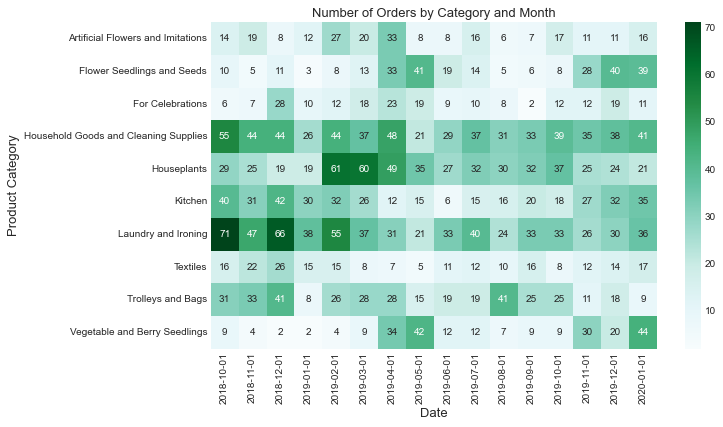

In [399]:
# Create a pivot table: number of unique orders per category per month
pivot_cat_din = data.pivot_table(index='category', columns='month', aggfunc='nunique', values='order_id')

# Plot heatmap
fig = plt.figure(figsize=figsize_norm)
sns.heatmap(pivot_cat_din, cmap=cmap, annot=True, xticklabels=(pivot_cat_din.columns).date)

# Add titles and axis labels
plt.title('Number of Orders by Category and Month', fontsize=fontsize)
plt.xlabel('Date', fontsize=fontsize)
plt.ylabel('Product Category', fontsize=fontsize)

# Show plot
plt.show()

Some product categories exhibit seasonal demand patterns:

- *For Celebrations* peaks in December and from March to May;

- *Artificial Flowers and Imitations* — from February to April;

- *Houseplants* — from February to April;

- *Kitchen* — during the winter months.

In the *Laundry and Ironing*, *Trolleys and Bags*, and *Textiles* categories, a peak in orders was observed in the final months of 2018, but this trend did not repeat in 2019 — the spike was likely driven by other factors.

An unusual pattern was seen in *Flower Seedlings and Seeds* and *Vegetable and Berry Seedlings*. In 2019, the peak in orders occurred in April and May, which is logical — this coincides with the beginning of the gardening season. However, another surge in orders for these categories occurred between November 2019 and January 2020 — an effect that was not observed during the winter of 2018–2019.

**Conclusion**

All products in the dataset were divided into the following 10 categories: *Household Goods and Cleaning Supplies, Vegetable and Berry Seedlings, Kitchen, Laundry and Ironing, Flower Seedlings and Seeds, Houseplants, Textiles, For Celebrations, Artificial Flowers and Imitations, and Trolleys and Bags*. The distribution is fairly balanced: each category includes between 106 and 389 items, represented in 206 to 621 orders, and generated revenue from ~87 to 825 thousand rubles.

The most interesting category is *Trolleys and Bags*: despite having the smallest assortment, it ranks 4th in the number of orders and leads in revenue, mainly due to the highest median product price (1,087 rubles).

The second-highest revenue comes from *Household Goods and Cleaning Supplies*, which has the widest assortment (389 items), ranks 2nd in number of orders, and features mid-priced goods (374 rubles median).

*Laundry and Ironing* also shows strong performance (775.2 thousand rubles) — it leads in order count, ranks 4th in assortment volume, and has a relatively high median price (652 rubles).

*Textiles* performs decently as well: despite ranking 7th in assortment size and 9th in order count, it brings in notable revenue (306 thousand rubles, 5th place), thanks to relatively high product prices (712 rubles median).

The least profitable categories are *Vegetable and Berry Seedlings*, *Artificial Flowers and Imitations*, and *Flower Seedlings and Seeds*. Products in these categories are among the cheapest (52–112 rubles). Notably, the seedling categories have a large product assortment.

Some product categories show seasonality in demand:

*For Celebrations* peaks in December and from March to May;

*Artificial Flowers and Imitations* and *Houseplants* from February to April;

*Kitchen* in the winter months;

*Flower Seedlings and Seeds* and *Vegetable and Berry Seedlings* in April and May.

In six categories, sales patterns differ between November–January in the 2018–2019 and 2019–2020 seasons. In *Laundry and Ironing*, *Trolleys and Bags*, *Textiles*, and *Household Goods and Cleaning Supplies*, the number of orders declined in the second season. Meanwhile, in *Flower Seedlings and Seeds* and *Vegetable and Berry Seedlings*, it increased. This may explain the overall decline in the store’s financial performance: customers increasingly ordered from lower-priced categories and less from higher-priced ones. This trend may be caused by external factors or reflect internal issues within the store.

## Customer Segmentation Based on Purchase History

### Segmenting Customers Using RFM Analysis

Customers will be grouped based on three key metrics:

- Recency — how recently the customer made a purchase
- Frequency — how often the customer has made purchases
- Monetary Value — how much the customer has spent

First, we'll create a summary table `pivot_rfm` to compile the necessary information for each unique customer.

In [400]:
# Determine the latest purchase date in the dataset
last_order = data['date'].max()
pivot_rfm=data.groupby('customer_id').agg({'date': lambda x: (last_order - x.max()).days,
                                           'order_id': lambda x: len(x.unique()),
                                           'total': lambda x: x.sum()})\
                                     .rename(columns={'date': 'recency',
                                                      'order_id': 'frequency', 
                                                      'total': 'monetary_value'})\
                                     .reset_index()

Next, we’ll calculate the first and second terciles (`q1` and `q2`) for the fields `recency`, `frequency`, and `monetary_value`, which will allow us to split customers into three equally sized groups for each metric.

Using these thresholds, we’ll define and apply a function that assigns a score from 1 to 3 to each customer for each metric. According to this classification:

1 represents the best score (i.e., the fewest days since last order, the highest purchase frequency, and the highest spending),

3 indicates the lowest performance.

In [401]:
q1_r, q2_r = np.percentile(pivot_rfm['recency'], [33.3, 66.6])
q1_f, q2_f = np.percentile(pivot_rfm['frequency'], [33.3, 66.6])
q1_m, q2_m = np.percentile(pivot_rfm['monetary_value'], [33.3, 66.6])
display('Recency limits {}-{}'.format(q1_r, q2_r),
        'Frequency {}-{}'.format(q1_f, q2_f),
        'Monetary_value {}-{}'.format(q1_m, q2_m))

'Recency limits 105.0-301.0'

'Frequency 1.0-2.0'

'Monetary_value 524.0-1350.0'

In [402]:
# Create a function to categorize users based on RFM metrics
def rfm_cat(row, q1, q2, column):
    """
    The rfm_cat function assigns a customer category based on the
    Recency, Frequency, or Monetary Value metric.

    The function takes four arguments: a row from the DataFrame, 
    the category thresholds q1 and q2, and the name of the column 
    to be categorized.

    It compares the value in the specified column with the thresholds 
    and returns a category from 1 to 3.
    """
    if column != 'recency':
        if row[column] <= q1:
            return 3
        elif row[column] > q2:
            return 1
        else:
            return 2
    else:
        if row[column] > q2:
            return 3
        elif row[column] <= q1:
            return 1
        else:
            return 2

In [403]:
# Apply the function to create new columns with RFM categories
pivot_rfm['recency_cat'] = pivot_rfm.apply(rfm_cat, q1=q1_r, q2=q2_r, column='recency', axis=1)
pivot_rfm['frequency_cat'] = pivot_rfm.apply(rfm_cat, q1=q1_f, q2=q2_f, column='frequency', axis=1)
pivot_rfm['monetary_v_cat'] = pivot_rfm.apply(rfm_cat, q1=q1_m, q2=q2_m, column='monetary_value', axis=1)

# Create the overall RFM score
pivot_rfm['rfm'] = pivot_rfm.apply(lambda row: ''.join([str(row['recency_cat']), 
                                                        str(row['frequency_cat']), 
                                                        str(row['monetary_v_cat'])]), axis=1)
pivot_rfm.head()

,customer_id,recency,frequency,monetary_value,recency_cat,frequency_cat,monetary_v_cat,rfm
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,2,3,2,232
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,3,3,3,333
2,00299f34-5385-4d13-9aea-c80b81658e1b,108,1,914.0,2,3,2,232
3,002d4d3a-4a59-406b-86ec-c3314357e498,368,1,1649.0,3,3,1,331
4,003bbd39-0000-41ff-b7f9-2ddaec152037,123,1,2324.0,2,3,1,231


In [404]:
# Check how many users fall into each RFM group
pivot_rfm.groupby('rfm').agg({'customer_id':'count'}).sort_values('rfm').reset_index()

,rfm,customer_id
0,111,1
1,121,313
2,122,256
3,123,162
4,131,13
5,132,18
6,133,40
7,211,12
8,212,5
9,213,2


In the final `RFM` table, only 24 unique RFM groups are represented.
Let’s divide these groups into the following 5 customer segments:

- Best Customers: 111, 121, 211, 221 – these customers buy frequently and spend a lot, with their last purchase being relatively recent.

- Thrifty Customers: 123, 213, 133, 223, 233 – they made recent purchases but didn’t spend much.

- Average Customers: 122, 212, 222 – characterized by moderate spending and purchase frequency, with a relatively recent last purchase.

- At-Risk Customers: 331, 321, 311, 322 – have above-average spending or frequency, but haven't made a purchase in a long time.

- Infrequent/New Customers: 131, 132, 231, 232 – spend at average or above-average levels, but purchase rarely.

- Low-Value Customers: 333, 323, 313 – they spend little and purchase rarely and/or a long time ago.

Let’s assign each user from the RFM table to one of these segments and check how many users fall into each group.

In [405]:
# Create a dictionary mapping RFM groups to customer segments
segments_dict = {
    'Best Customers': ['111', '121', '211', '221'],
    'Thrifty Customers': ['123', '213', '133', '223', '233'],
    'Average Customers': ['122', '212', '222'],
    'At-Risk Customers': ['331', '321', '311', '322', '332'],
    'Infrequent/New Customers': ['131', '132', '231', '232'],
    'Low-Value Customers': ['333', '323', '313'],
}

In [406]:
# Create a function that segments customers based on the segments_dict dictionary
def customer_segment(row):
    """
    The customer_segment function determines the customer's segment based on the RFM value 
    using a predefined mapping dictionary.
    
    The function takes one argument – a row from a DataFrame – and checks whether the RFM value 
    belongs to one of the predefined RFM groups. 
    If a match is found, the function returns the corresponding segment name.
    If no match is found, the function returns None.
    """
    segment = None
    for seg, rfm_groups in segments_dict.items():
        if any(rfm_group in row['rfm'] for rfm_group in rfm_groups):
            segment = seg
            break
    return segment

In [407]:
# Apply the segmentation function to create a new column in the DataFrame
pivot_rfm['segment'] = pivot_rfm.apply(customer_segment, axis=1)

In [408]:
# Check how many users belong to each segment
pivot_rfm.groupby('segment').agg({'customer_id':'count'}).sort_values('customer_id', ascending = False)

,customer_id
segment,
Thrifty Customers,521
At-Risk Customers,519
Infrequent/New Customers,445
Best Customers,362
Low-Value Customers,282
Average Customers,279


The distribution across customer segments is fairly balanced.

No resources should be allocated to `Low-Value Customers` — they made their last purchase a long time ago and spent very little overall.

`Thrifty Customers` tend to make low-value purchases. These clients should be encouraged to spend more — for example, by offering products from categories they are interested in, or providing discounts for purchases over a certain amount.

`At-Risk Customers` haven’t made a purchase in a while, but in the past showed good levels of spending and/or order frequency. It might be worth trying to win them back through special offers, promo codes, and similar marketing efforts.

`Infrequent/New Customers` placed an order recently and generated decent revenue, but do so rarely. Some may be new customers. These users can be encouraged to buy more frequently through seasonal or personalized email campaigns, loyalty programs, or recommendations based on previously purchased product categories.

`Best Customers` order often and spend the most. Their loyalty can be reinforced through dedicated loyalty programs or exclusive offers.

`Average Customers` show moderate behavior in terms of spending and order frequency. They can be motivated to spend more using the same strategies applied to `Thrifty Customers`.

### Analysis of General Metrics Across Customer Segments 

We will transfer customer segment data from the `RFM` table to the main `data` dataset and create a summary table containing the number of orders (total and per user), revenue (total and per user), and average check, broken down by segment.

In [409]:
data=data.merge(pivot_rfm[['customer_id', 'segment']], on='customer_id')

In [410]:
pivot_seg = data.groupby('segment').agg({'customer_id':'nunique', 'order_id':'nunique', 'total':'sum'})\
    .sort_values('total', ascending=False)\
    .merge(data.groupby(['segment', 'order_id']).agg({'total':'sum'}).groupby('segment')\
           .agg({'total':'mean'}), on='segment')\
    .merge(data.groupby(['segment', 'order_id']).agg({'quantity':'sum'}).groupby('segment')\
           .agg({'quantity':'mean'}), on='segment')\
    .rename(columns={'total_x':'revenue', 'total_y':'avg_bill', 'order_id':'n_orders',
                     'customer_id':'n_customers', 'quantity':'avg_quantity',})
pivot_seg['revenue_per_customer'] = pivot_seg['revenue']/pivot_seg['n_customers']
pivot_seg['orders_per_customer'] = pivot_seg['n_orders']/pivot_seg['n_customers']
pivot_seg.applymap('{:.1f}'.format)

,n_customers,n_orders,revenue,avg_bill,avg_quantity,revenue_per_customer,orders_per_customer
segment,,,,,,,
At-Risk Customers,519.0,725.0,1326143.0,1829.2,7.3,2555.2,1.4
Best Customers,362.0,758.0,1240440.8,1636.5,1.8,3426.6,2.1
Infrequent/New Customers,445.0,445.0,861596.5,1936.2,8.5,1936.2,1.0
Average Customers,279.0,564.0,244424.0,433.4,1.3,876.1,2.0
Thrifty Customers,521.0,702.0,138580.2,197.4,1.8,266.0,1.3
Low-Value Customers,282.0,300.0,79032.0,263.4,2.7,280.3,1.1


The performance of customer segments aligns with the previously described characteristics.

The `Best Customers` segment includes 362 store clients. A customer in this segment generates the highest revenue (3,427 RUB). On average, they placed 2.1 orders during the observed period, with an average check of 1,636 RUB and 1.8 product units per order.

The `At-Risk Customers` segment includes 519 users, making it the largest group. Interestingly, the average check for this group is even higher than that of the `Best Customers`, at 1,829 RUB. These clients placed about 1.4 orders each and generated 2,555 RUB in revenue per customer. They tend to buy in larger quantities, averaging 7.3 items per order.

The `Infrequent/New Customers` segment consists of 445 users. As expected, they placed only one order each — the lowest among all segments — but with the highest average check (1,936 RUB), which also equals their total revenue per customer. This group appears to favor bulk purchases, buying an average of 8.5 items per order.

The `Average Customers` segment includes 279 clients who placed about two orders each, with an average check of 433 RUB and an average of 1.3 product units per order. Their per-customer revenue was 876 RUB.

There are 521 users in the `Thrifty Customers` segment. On average, they placed 1.3 orders with a check of 197 RUB and purchased 1.8 product units per order.

Finally, there are 282 users in the `Low-Value Customers` segment. Interestingly, the average check and revenue per customer in this group are slightly higher than those in the `Thrifty Customers` segment. However, it’s important to note that these clients have not placed an order in a long time.

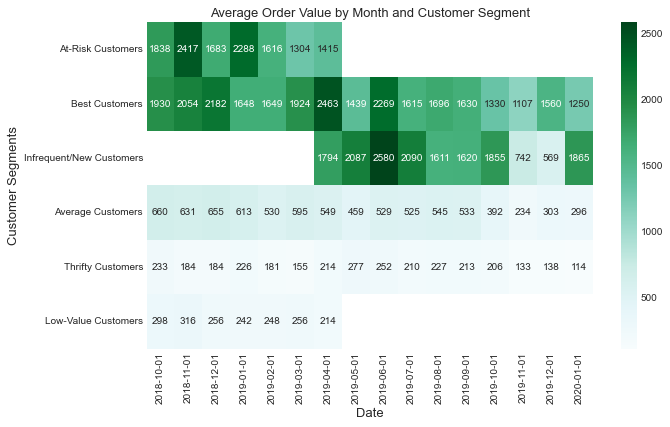

In [411]:
# Create a pivot table for average order value
pivot_seg_din = data.groupby(['segment', 'month', 'order_id']).agg({'total':'sum'})\
    .pivot_table(index='segment', columns='month', aggfunc='mean', values='total').reindex(pivot_seg.index)

# Create the figure
fig = plt.figure(figsize=figsize_norm)
# Plot the heatmap
sns.heatmap(pivot_seg_din, cmap=cmap, annot=True, fmt='.0f', xticklabels=(pivot_cat_din.columns).date)
# Add chart and axis labels
plt.title('Average Order Value by Month and Customer Segment', fontsize=fontsize)
plt.xlabel('Date', fontsize=fontsize)
plt.ylabel('Customer Segments', fontsize=fontsize)
# Display the chart
plt.show()

Users from the At-Risk and Low-Value segments placed their last orders a long time ago, while the Infrequent/New Customers segment includes only those who made a purchase relatively recently. Therefore, the data for these segments does not cover the entire time period.

For the Best, Average, and Thrifty customer segments, we can conclude that the average order value remained relatively stable across the entire period.

**Conclusion**

An RFM analysis was conducted to segment the store’s customers into six groups based on how recently a customer made a purchase (**Recency**), how frequently they purchased (**Frequency**), and how much they spent in total (**Monetary Value**). The following segments were identified:

- **`Best Customers`**: This segment includes 362 customers. These users generate the highest profit (₽3,427 on average). They placed an average of 2.1 orders during the analysis period, with an average order value of ₽1,636 and 1.8 items per order. They do not have long gaps between orders — these are the most loyal customers.


- **`Thrifty Customers`**: This group includes 521 users. On average, they placed 1.3 orders with an average order value of ₽197 and 1.8 items per order. The low revenue from these customers is explained by the small number of items in their orders (2 products on average).


- **`Average Customers`**: This segment includes 279 users who placed an average of 2 orders with a check of ₽433 and 1.3 items per order. The revenue per customer in this segment was ₽876. The average order value in this group tends to decline over time.


- **`At-Risk Customers`**: This is the largest segment, with 519 users. Interestingly, their average order value (₽1,829) is higher than that of the `Best Customers`. They placed an average of 1.4 orders and brought in ₽2,555 per customer. They tend to buy in bulk, with an average of 7.3 items per order. However, these users haven’t placed any orders in a long time.


- **`Infrequent/New Customers`**: This group includes 445 customers. By definition, they placed only one order (the lowest among all segments) but had the highest average order value of ₽1,936 — which also matches the revenue they brought in. These users prefer bulk purchases, with an average of 8.5 items per order. Their purchases were made relatively recently.


- **`Low-Value Customers`**: This segment includes 282 customers who are not worth targeting with marketing resources — they placed their last order a long time ago and spent very little. Interestingly, their average order value and total revenue per user is higher than that of the `Thrifty Customers`, although the latter are significantly more loyal.


Users from the `At-Risk Customers` and `Low-Value Customers` segments placed their last orders long ago, while the `Infrequent/New Customers` group includes only recent buyers — therefore, their data covers only part of the observed time period. For the `Best Customers`, `Average Customers`, and `Thrifty Customers`, we can conclude that the average order value remained relatively stable across the entire period.


## Formulation and Testing of Statistical Hypotheses

We will test the statistical significance of differences in the average number of orders per user between segments. Let’s define our hypotheses and set the significance level alpha:
```
H₀: The mean number of orders per visitor in group A = the mean number of orders per visitor in group B
H₁: The mean number of orders per visitor in group A ≠ the mean number of orders per visitor in group B
alpha = 0.05
```
Next, we will test the statistical significance of differences in the average revenue per order per user between segments. The hypotheses are:
```
H₀: The mean revenue per order per visitor in group A = the mean revenue per order per visitor in group B
H₁: The mean revenue per order per visitor in group A ≠ the mean revenue per order per visitor in group B
alpha = 0.05
```

In [412]:
# To account for multiple comparisons (10 comparisons for each hypothesis), we apply the Bonferroni correction:
bonferroni_alpha = 0.05 / 10

In [413]:
# prepare summary tables for analysis:
orders = data.groupby(['segment', 'customer_id']).agg({'order_id': 'nunique'}).reset_index()
avg_bill = data.groupby(['segment', 'customer_id', 'order_id']).agg({'total':'sum'})\
               .groupby(['segment', 'customer_id']).agg({'total':'mean'}).reset_index()

Let’s create a function that will test the statistical significance of differences in selected metrics, and a loop that will iterate through all combinations of customer segments for number of orders and average order value.

In [414]:
def hypothesis_check(segment_1, segment_2):
    """
    The hypothesis_check() function compares two data segments 
    using the Mann-Whitney U test to detect statistically 
    significant differences between their means.
    """
    p_value = stats.mannwhitneyu(segment_1, segment_2)[1]
    if p_value < bonferroni_alpha:
        display('p-value = {} Reject the null hypothesis: significant difference detected.'
                .format(p_value))
    else:
        display('p-value = {} Failed to reject the null hypothesis: no significant difference.'
                .format(p_value))
    display('------------------------------------------------------------------------------')

In [415]:
# create a list of all segments except 'Low-Value Customers'
segments = pivot_seg.query('segment != "Low-Value Customers"').index.to_list()

In [416]:
# compare all possible pairs of segments
count = 0
for i in range(5):
    for j in range(i + 1, 5):
        count += 1
        display('No.{}. Compared segments: {} and {}'.format(count, segments[i], segments[j]))
        hypothesis_check(
            orders[orders['segment'] == segments[i]]['order_id'], 
            orders[orders['segment'] == segments[j]]['order_id']
        )

'No.1. Compared segments: At-Risk Customers and Best Customers'

'p-value = 7.084690156405333e-152 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'No.2. Compared segments: At-Risk Customers and Infrequent/New Customers'

'p-value = 3.3244601955000726e-10 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'No.3. Compared segments: At-Risk Customers and Average Customers'

'p-value = 3.620970935567682e-134 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'No.4. Compared segments: At-Risk Customers and Thrifty Customers'

'p-value = 1.842322131080651e-23 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'No.5. Compared segments: Best Customers and Infrequent/New Customers'

'p-value = 4.137596249850177e-175 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'No.6. Compared segments: Best Customers and Average Customers'

'p-value = 0.1689733832905167 Failed to reject the null hypothesis: no significant difference.'

'------------------------------------------------------------------------------'

'No.7. Compared segments: Best Customers and Thrifty Customers'

'p-value = 2.9904830489607886e-86 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'No.8. Compared segments: Infrequent/New Customers and Average Customers'

'p-value = 1.3885548078056643e-158 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'No.9. Compared segments: Infrequent/New Customers and Thrifty Customers'

'p-value = 1.1885943728076307e-42 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'No.10. Compared segments: Average Customers and Thrifty Customers'

'p-value = 3.757832629765894e-71 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

In [417]:
for i in range(5):
    for j in range(i+1, 5):
        count += 1
        display('№{}. Compared segments: {} и {}'.format(count, segments[i], segments[j]))
        hypothesis_check(avg_bill[avg_bill['segment'] == segments[i]]['total'], 
                        avg_bill[avg_bill['segment'] == segments[j]]['total'])

'№11. Compared segments: At-Risk Customers и Best Customers'

'p-value = 0.1428784906547324 Failed to reject the null hypothesis: no significant difference.'

'------------------------------------------------------------------------------'

'№12. Compared segments: At-Risk Customers и Infrequent/New Customers'

'p-value = 0.7209052979117778 Failed to reject the null hypothesis: no significant difference.'

'------------------------------------------------------------------------------'

'№13. Compared segments: At-Risk Customers и Average Customers'

'p-value = 1.2984384993367958e-103 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'№14. Compared segments: At-Risk Customers и Thrifty Customers'

'p-value = 3.639331684561822e-167 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'№15. Compared segments: Best Customers и Infrequent/New Customers'

'p-value = 0.23019333191798463 Failed to reject the null hypothesis: no significant difference.'

'------------------------------------------------------------------------------'

'№16. Compared segments: Best Customers и Average Customers'

'p-value = 6.624292554150276e-104 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'№17. Compared segments: Best Customers и Thrifty Customers'

'p-value = 3.359780641127276e-141 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'№18. Compared segments: Infrequent/New Customers и Average Customers'

'p-value = 2.7444504032508555e-106 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'№19. Compared segments: Infrequent/New Customers и Thrifty Customers'

'p-value = 1.887302482389346e-158 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

'№20. Compared segments: Average Customers и Thrifty Customers'

'p-value = 4.2240130850618253e-73 Reject the null hypothesis: significant difference detected.'

'------------------------------------------------------------------------------'

**Conclusions**

The analysis revealed no statistically significant differences in the average number of orders per customer between the segments Best Customers and Average Customers, as well as in the average order value per customer among the segments Best Customers, At-Risk Customers, and Infrequent/New Customers (in all combinations). In all other cases, the differences in parameters were statistically significant.

We can conclude that the segmentation was performed successfully.

## Analysis of Category Preferences by Customer Segments 

To assess preferences, we will calculate the share of orders that include products from a specific category.

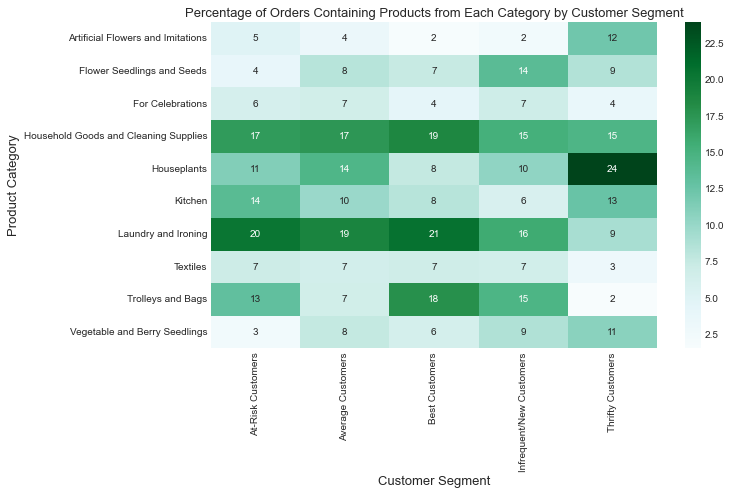

In [418]:
# Create a pivot table showing the number of unique orders per category and segment (excluding 'Low-Value Customers')
pivot_seg_cat = data.query('segment != "Low-Value Customers"')\
                    .pivot_table(index='category', columns='segment', aggfunc='nunique', values='order_id')

# Calculate percentage of orders in each category per segment
col_sums = pivot_seg_cat.sum()
pivot_seg_cat = pivot_seg_cat.apply(lambda x: x / col_sums[x.name] * 100, axis=0)

# Plot heatmap
fig = plt.figure(figsize=figsize_norm)
sns.heatmap(pivot_seg_cat, cmap=cmap, annot=True, fmt='.0f')
plt.title('Percentage of Orders Containing Products from Each Category by Customer Segment', fontsize=fontsize)
plt.xlabel('Customer Segment', fontsize=fontsize)
plt.ylabel('Product Category', fontsize=fontsize)
plt.show()

Based on the resulting heatmap, we can conclude that customer preferences by segment are as follows:

- Best Customers most frequently purchase items from the Laundry and Ironing category (21%), Household Goods and Cleaning Supplies (19%), and Trolleys and Bags (18%). Notably, the Laundry and Ironing and Trolleys and Bags categories are associated with the highest median product prices.

- Infrequent/New Customers tend to favor Laundry and Ironing (16%), Household Goods and Cleaning Supplies (15%), Trolleys and Bags (15%), and Flower Seedlings and Seeds (14%).

- Average Customers prefer Laundry and Ironing (19%), Household Goods and Cleaning Supplies (17%), and Houseplants (14%).

- At-Risk Customers show a preference for Laundry and Ironing (20%), Household Goods and Cleaning Supplies (17%), Kitchen (14%), and Trolleys and Bags (13%). The almost complete absence of orders from seedling-related categories may be due to these customers having stopped shopping before the gardening season began.

- Thrifty Customers prefer Houseplants (24%), Household Goods and Cleaning Supplies (15%), Kitchen (13%), and Artificial Flowers and Imitations (12%).

It is also worth noting that all segments show relatively low interest in Textiles and For Celebrations, with these categories accounting for no more than 7% of all orders.

## Conclusions and Recommendations

**Preprocessing**

During data preprocessing, 1,924 duplicates (~26% of all records) were removed. Additionally, 2 records were excluded where the product price exceeded 10,000 rubles or the product quantity exceeded 400 units. The 'date' field was converted to datetime format. The final dataset after preprocessing contains 5,477 records. The large number of duplicates indicates issues in the data export process.

**General Store Performance Indicators**

The data covers the period from October 1, 2018, to January 31, 2020 (16 months) and contains records on 2,408 customers and 3,494 orders. Over the entire period, the store's total revenue amounted to 3,890,216 rubles, with an average monthly revenue of 243,138 rubles and an average order value of 1,113 rubles.

Monthly revenue and average order value show a downward trend throughout the period. This may indicate problems, as performance in Q4 2019 is noticeably lower than in 2018.

Customer behavior does not depend on the day of the month, but it does vary by day of the week and time of order placement. Mondays and Tuesdays show the highest number of orders (average 8.3–8.6), while the highest average order value occurs on Fridays (1,257 rubles) and Tuesdays (1,268 rubles). Saturdays show both fewer orders (5.2) and the lowest average order value (925 rubles). Peak order activity occurs from 10–12 a.m., whereas the highest average order values come from early morning orders at 6–7 a.m.

**Product Categorisation**

All products in the dataset were classified into the following 10 categories:

- 'Household Goods and Cleaning Supplies'
- 'Vegetable and Berry Seedlings'
- 'Kitchen'
- 'Laundry and Ironing'
- 'Flower Seedlings and Seeds'
- 'Houseplants'
- 'Textiles'
- 'For Celebrations'
- 'Artificial Flowers and Imitations'
- 'Trolleys and Bags'

Each category includes between 106 and 389 products, which appear in 206 to 621 orders and generated revenue ranging from ~87,000 to 825,000 rubles.

The most notable category is 'Trolleys and Bags': despite the smallest assortment, this category ranks 4th by number of orders and 1st by revenue, mainly due to the highest product price (median: 1,087 rubles).

The second-highest revenue comes from 'Household Goods and Cleaning Supplies', which has the broadest assortment (389 items), ranks 2nd by order volume, and has an average product price of 374 rubles.

'Household Goods and Cleaning Supplies' and 'Laundry and Ironing' also contribute significantly (775.2k and 755k rubles, respectively). The 'Laundry and Ironing' category leads in the number of orders and ranks 4th in assortment volume, with a high median product price (652 rubles).

'Textiles' shows promising results: with a modest assortment (7th place) and relatively few orders (9th place), it still generates 306k rubles (5th place), thanks to high product prices (712 rubles).

The least profitable categories are 'Vegetable and Berry Seedlings', 'Artificial Flowers and Imitations', and 'Flower Seedlings and Seeds'. Products in these categories are among the cheapest (52–112 rubles), although the seedling categories have a substantial assortment.

Seasonal demand is observed in the following categories:

- 'For Celebrations' (December, March–May)
- 'Artificial Flowers and Imitations' and 'Houseplants' (February–April)
- 'Kitchen' (winter months)
- 'Flower Seedlings and Seeds' and 'Vegetable and Berry Seedlings' (April, May)

Six categories show variation in order volume between the November–January periods of the 2018–2019 and 2019–2020 seasons. In 'Laundry and Ironing', 'Trolleys and Bags', 'Textiles', and 'Household Goods and Cleaning Supplies', the number of orders decreased in the second season, while in 'Flower Seedlings and Seeds' and 'Vegetable and Berry Seedlings', it increased. This shift may explain the decline in the store’s financial metrics: users increasingly order cheaper product categories and less often purchase from more expensive ones. This could be driven by external factors or internal store issues.

**Customer Segmentation**

An RFM analysis was conducted to segment customers based on:

- How recently they made a purchase (Recency)
- How often they made purchases (Frequency)
- How much they spent in total (Monetary Value)

The following segments were identified: 
- Best Customers, 
- Thrifty Customers, 
- Average Customers, 
- At-Risk Customers, 
- Infrequent/New Customers, 
- Low-Value Customers. 

A detailed breakdown of each segment follows.
Statistical testing showed no significant differences in the average number of orders between Best Customers and Average Customers, nor in the average order value between Best Customers, At-Risk Customers, and Infrequent/New Customers (in all combinations). In all other cases, the differences were statistically significant. This indicates that the segmentation was successful.

**User Profiles and Recommendations for Performance Improvement**

`Best Customers`: This segment includes 362 customers. Users in this segment generate the highest profit (3427 RUB). On average, they placed 2.1 orders during the observation period, with an average order value of 1636 RUB and an average of 1.8 items per order. These are the most loyal customers with short intervals between orders. Despite ordering relatively few items, they contribute significantly to revenue due to a preference for more expensive products (categories with high median prices). They most frequently purchase products from the following categories: `Laundry and Ironing` (21% of orders), `Household Goods and Cleaning Supplies` (19%), and `Trolleys and Bags` (18%). This segment represents the most valuable customers and could be used for surveys. Consider implementing or maintaining a loyalty program for them.

`Thrifty Customers`: This group includes 521 users. On average, they placed 1.3 orders with a check of 197 RUB and 1.8 items per order. Their low revenue is due to small order sizes (on average 2 products) and preferences for low-cost product categories such as `Houseplants` (24%), `Household Goods and Cleaning Supplies` (15%), `Kitchen` (13%), and `Artificial Flowers and Imitations` (12%). The main goal for this segment is to encourage larger orders and purchases from more expensive categories. This can be done by recommending relevant higher-priced products before checkout and offering discounts on orders above a certain threshold.

`Average Customers`: This group includes 279 clients who placed, on average, 2 orders with an average check of 433 RUB and 1.3 items per order. The revenue per customer in this group is 876 RUB. The average check in this group shows a downward trend. They mostly buy from `Laundry and Ironing` (19%), `Household Goods and Cleaning Supplies` (17%), and `Houseplants` (14%). They can be encouraged to spend more using similar methods as for `Thrifty Customers`.

`At-Risk Customers`: This is the largest segment with 519 users. The average check per customer in this segment is higher than that of the `Best Customers`—1829 RUB. These users placed an average of 1.4 orders, generating 2555 RUB per customer. They typically purchase in bulk, with an average of 7.3 items per order. However, they have not made recent purchases. They prefer more expensive product categories: `Laundry and Ironing` (20%), `Household Goods and Cleaning Supplies` (17%), `Kitchen` (14%), and `Trolleys and Bags` (13%). Their near absence from categories such as `Flower Seedlings and Seeds` may suggest they churned before the gardening season. These are highly valuable users, and it may be worthwhile to try to win them back with special offers, promo codes, etc.

`Infrequent/New Customers`: This segment includes 445 users. By definition, these customers placed only one order (the lowest among all segments), but they had the highest average order value (1936 RUB), which equals the revenue they generated. They tend to buy in bulk—on average, 8.5 items per order—and placed their order recently. They prefer categories like `Laundry and Ironing` (16%), `Household Goods and Cleaning Supplies` (15%), `Trolleys and Bags` (15%), and `Flower Seedlings and Seeds` (14%). These users can be encouraged to buy more frequently through seasonal or personalized email campaigns, as well as recommendations for products from previously purchased categories. A loyalty program could also be introduced.

`Low-Value Customers`: There are 282 users in this segment, and it is not advisable to allocate resources toward them—they have not made purchases in a long time and spent very little. Interestingly, their average check and customer revenue exceed those of the `Thrifty Customers`, but the latter group demonstrates significantly greater loyalty.

**General Recommendations**

First and foremost, key performance indicators of the store (monthly revenue and average check) show a declining trend, which may indicate the presence of underlying issues. There are signs that customers are ordering more frequently from lower-priced categories and less from high-value categories.

Among clearly seasonal products, seedlings (2 categories) stand out. These are typically purchased in April and May. Seasonal email campaigns can be sent to users who previously bought from these categories.

In the `Laundry and Ironing` category, there are many ironing boards and related accessories. When a customer purchases a board or an accessory, other complementary items can be suggested before checkout.

The catalog includes a section for `For Celebrations` products—gift sets for March 8, fresh flowers, and Christmas trees. Seasonal promotions can be sent to customers offering products from this catalog.

Additionally, there is a noticeable low interest across all segments in the `Textiles` category (no more than 7% of all orders). This category includes relatively expensive items that could increase the average order value. It is worth investigating the cause of the low demand—limited assortment, lack of need, poor site placement, or difficult navigation.

The `For Celebrations` category is unprofitable and unpopular. It may be worth reviewing its content and potentially discontinuing some products.